## 퍼셉트론
### 01. 퍼셉트론의 이해
- 인공신경망(딥러닝)의 기원이 되는 알고리즘.
- 하나 이상의 신호를 입력받아 어떠한 계산을 수행한 후 하나의 Output를 출력한다.
- 퍼셉트론은 1과 0의 신호만 가질 수 있다.
- 신호가 흐르면 1, 흐르지 않으면 0이

### 1. input이 2개인 퍼셉트론
- $x_1$ 과 $x_2$는 입력 신호, $y$는 출력 신호,$w_1$과 $w_2$는 가중치를 의미한다. ($w$ : weight)
- **$x$와 가중치 $w$를 곱한 값을 모두 더하여 하나의 값($y$)로 만들어 낸다.**
- 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해지고 그 값들을 모두 더해서 나온 값($y$)이 어떠한 임계값(θ)을 넘을 때만 1로 출력한다.
- 신경망에서 만들어진 값($y$)을 적절한 출력값으로 변환해 주는 함수를 **활성화 함수**라고 한다.
- 입력 신호와 출력 신호를 담고있는 원은 **노드** 혹은 **뉴런**이라 부른다.

#### y를 수식으로 나타내기

$$
y = \begin{cases} 
0 & \text{if } w_1x_1 + w_2x_2 \leq \theta \\
1 & \text{if } w_1x_1 + w_2x_2 > \theta
\end{cases}
$$

### 2. 논리회로
- 논리 연산을 통해 전기 장치를 제어하는 통로.
- 컴퓨터 및 기타 전기 장치를 작동하게 만드는 기본 부품이다.
- 불 대수를 이용하여 설계
- 여러 입력을 해도 1개의 출력만 나온다.


### 3. 게이트
- 논리 회로의 기초 구성요소.
- 각 게이트는 논리 연산 하나를 구현한다.

#### 게이트의 종류

![img](gate2.png)

퍼셉트론과 논리회로의 원리가 동일하기 때문에 퍼셉트론을 사용하여 논리회로를 구현할 수 있다.



### 02. 퍼셉트론 구현하기
#### 1. 패키지 참조하기

In [27]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD    # 옵티마이저
from tensorflow.keras.losses import mse        # OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

### 2. AND 게이트
#### 1) 데이터 셋 준비하기
 랜덤 시드값 고정

In [28]:
np.random.seed(777)


데이터 셋 구성

In [29]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [0], [0], [1]])

#### 3) 데이터 전처리
간단한 데이터 이므로 이 예제에서는 수행하지 않는다.
#### 4) 탐색적 데이터 분석

In [30]:
# flatten : 무조건 1차원으로 풀어버린다.
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
0,1,0
0,0,1
1,1,1


#### 5) 데이터 셋 분할하기
>훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 진행하지 않음.




#### 6) 모델 개발
모델 정의

In [31]:
model = Sequential()
model.add(Dense(1, input_shape = (2, ), activation = 'linear'))
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500


1/1 [==============================] - 0s 179ms/step - loss: 0.1108 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1101 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1094 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1088 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1082 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1076 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1070 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1065 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1059 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1054 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1049 - acc: 0.7

,loss,acc
epochs,,
1,0.110763,0.75
2,0.110092,0.75
3,0.109442,0.75
4,0.108814,0.75
5,0.108205,0.75
...,...,...
496,0.063422,1.00
497,0.063415,1.00
498,0.063409,1.00


### 7) 학습 결과 평가
평가결과 시각화


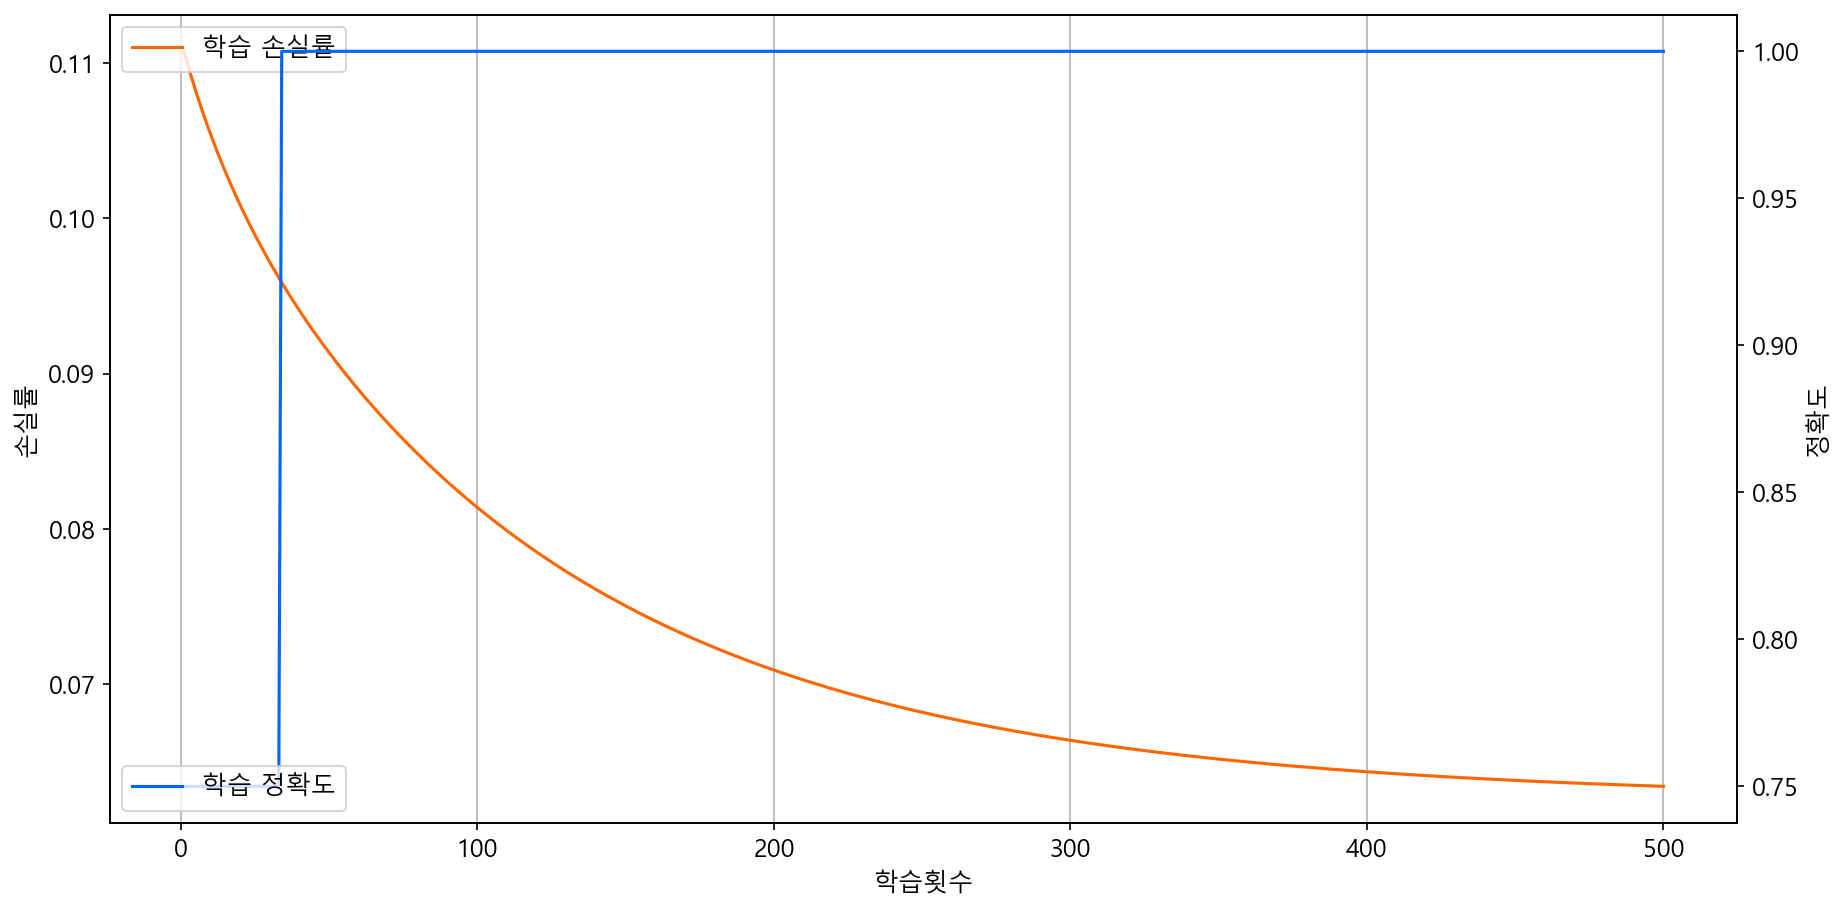

In [33]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('학습횟수')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

모델 성능 평가

In [34]:
ev = model.evaluate(train_x, train_y)
print('손실률 : %0.2f%%, 정확도: %0.2f%%' % (ev[0], ev[1]))

1/1 [==============================] - 0s 85ms/step - loss: 0.0634 - acc: 1.0000
손실률 : 0.06%, 정확도: 1.00%


가중치, 편향 확인

In [35]:
weight, bias = model.get_weights()
print("가중치: %s" %weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.48253435 0.44459337]
편향: [-0.20678155]


### 8) 학습 결과 적용
단일 데이터에 대한 예측치 산정


In [36]:
r00 = model.predict([[0, 0]])
r00


1/1 [==============================] - 0s 51ms/step


array([[-0.20678155]], dtype=float32)

In [37]:
result = "%s AND %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result


'False OR False => False'

학습 데이터 전체를 활용하여 예측값 만들기


In [38]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 20ms/step


array([[-0.20678155],
       [ 0.27575278],
       [ 0.23781182],
       [ 0.72034615]], dtype=float32)

In [39]:
df['예측값'] = r.reshape(-1).round()
df


,x1,x2,예측값
y,,,
0,0,0,-0.0
0,1,0,0.0
0,0,1,0.0
1,1,1,1.0


### 3. OR 게이트
1) 데이터 셋 준비하기
랜덤 시드값 고정

In [40]:
np.random.seed(444)

데이터 셋 구성

In [52]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [1], [1], [1]])

In [53]:
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
1,1,1


In [54]:
model = Sequential()
model.add(Dense(1, input_shape = (2, ), activation = 'linear'))
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
hist = model.fit(train_x, train_y, epochs=200)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/200
1/1 [==============================] - 0s 157ms/step - loss: 0.3814 - acc: 0.7500
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 0.3641 - acc: 0.7500
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3480 - acc: 0.7500
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 0.3328 - acc: 0.7500
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3185 - acc: 0.7500
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3051 - acc: 0.7500
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2925 - acc: 0.7500
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2807 - acc: 0.7500
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2696 - acc: 0.7500
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2592 - acc: 0.7500
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 0.249

,loss,acc
epochs,,
1,0.381372,0.75
2,0.364143,0.75
3,0.347966,0.75
4,0.332777,0.75
5,0.318514,0.75
...,...,...
196,0.070144,1.00
197,0.070070,1.00
198,0.069996,1.00


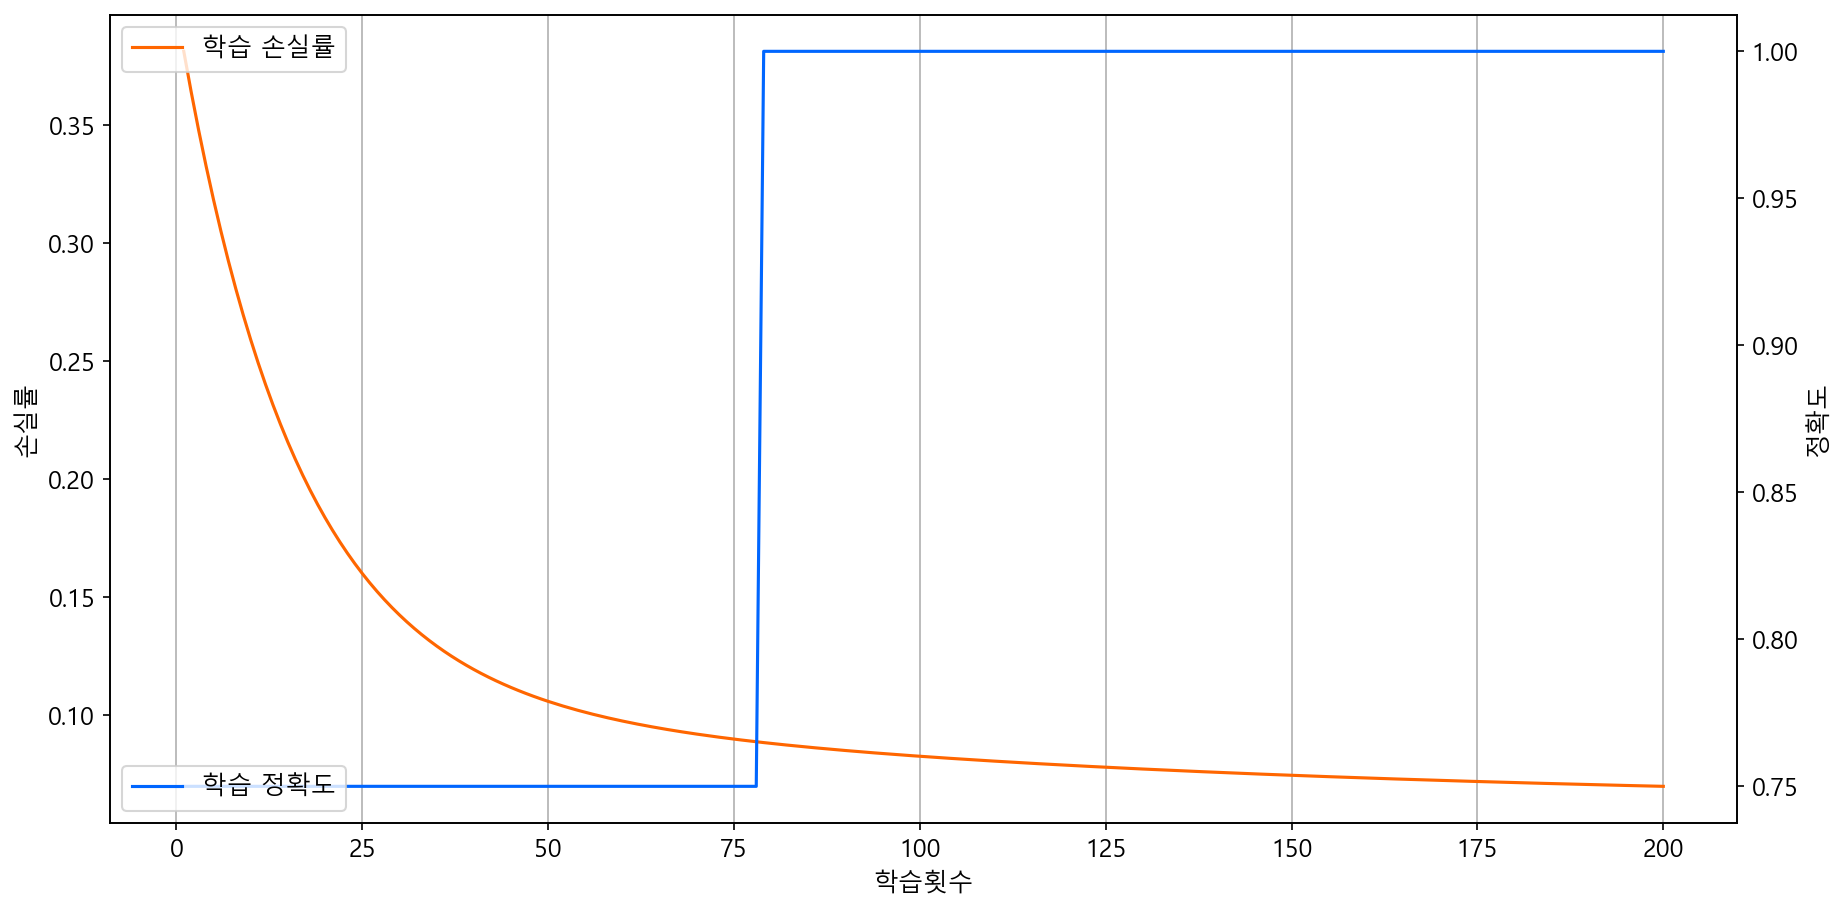

In [56]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('학습횟수')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

In [57]:
ev = model.evaluate(train_x, train_y)
print('손실률 : %0.2f%%, 정확도: %0.2f%%' % (ev[0], ev[1]))

1/1 [==============================] - 0s 62ms/step - loss: 0.0698 - acc: 1.0000
손실률 : 0.07%, 정확도: 1.00%


In [58]:
weight, bias = model.get_weights()
print("가중치: %s" %weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.58820635 0.35422248]
편향: [0.2833217]


In [59]:
r00 = model.predict([[0, 0]])
r00

1/1 [==============================] - 0s 38ms/step


array([[0.2833217]], dtype=float32)

In [60]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result


'False OR False => False'

In [61]:
r = model.predict(train_x)
r


1/1 [==============================] - 0s 14ms/step


array([[0.2833217 ],
       [0.871528  ],
       [0.63754416],
       [1.2257506 ]], dtype=float32)

In [62]:
df['예측값'] = r.reshape(-1).round()
df


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
1,1,1,1.0
